<h1 align=center><font size = 7>Lab 07 : K-Nearest Neighbors</font></h1>
<h1 align=center><font size = 5>Elham Khosravi</font></h1>
<h1 align=center><font size = 4>Hands-On Machine Learning, 2022 | DeadLine: 15th November, 13:00 </font></h1>



# Step0: Import Libraries

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Step1: Read Data

In [105]:
df = pd.read_csv('mushrooms.csv')

# Step2: Data Overview

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [107]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [108]:
df.shape

(8124, 23)

In [109]:
df['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [110]:
df.drop('veil-type', axis=1, inplace=True)

In [111]:
df['veil-color'].unique()

array(['w', 'n', 'o', 'y'], dtype=object)

In [112]:
df_num = df.select_dtypes(exclude='object')
df_obj = df.select_dtypes(include='object')

df_obj = pd.get_dummies(df_obj  , drop_first=True)

In [113]:
df_num.shape

(8124, 0)

In [114]:
df_obj

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [115]:
#df = df_obj
df.shape

(8124, 96)

# Step3: X, y

In [116]:
X = df.drop('class_p', axis=1)
y = df['class_p']

# Step4: Split the Data to Train & Test

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step5: Scaling the Features

In [118]:
def ScaleData(x_train, x_test):
    Scalar = StandardScaler()    
    
    Scalar.fit(x_train)
    
    S_x_train = Scalar.transform(x_train)
    S_x_test = Scalar.transform(x_test)
    
    return S_x_train , S_x_test

In [119]:
S_X_train, S_X_test= ScaleData(X_train, X_test)

In [120]:
S_X_train.shape , S_X_test.shape

((5686, 95), (2438, 95))

# Step6: KNN

## Creat the Model

In [121]:
KNN_model = KNeighborsClassifier(n_neighbors=1, weights='distance' , metric='minkowski', p=2)

## Train the Model

In [122]:
KNN_model.fit(S_X_train, y_train)    

KNeighborsClassifier(n_neighbors=1, weights='distance')

##  Prediction & Evaluation
<hr>
print classification report

In [123]:
y_pred = KNN_model.predict(S_X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=uint8)

In [124]:
accuracy_score(y_test, y_pred)

1.0

In [125]:
confusion_matrix(y_test, y_pred)

array([[1257,    0],
       [   0, 1181]], dtype=int64)

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# Step7: Elbow Method for Choosing Reasonable K Values

In [127]:
def ShowBestKNN(s_x_train, y__train, s_x_test, y__test):
    error = []

    for k  in range(1, 30):
        KNN_model = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='minkowski', p=2)

        KNN_model.fit(s_x_train, y__train)

        y_pred = KNN_model.predict(s_x_test)

        test_error = 1- accuracy_score(y__test, y_pred)

        error.append(test_error)
        
    plt.figure(figsize=(12, 6))
    plt.plot(error)

    plt.xticks(np.arange(1,30 ,1))
    plt.show()

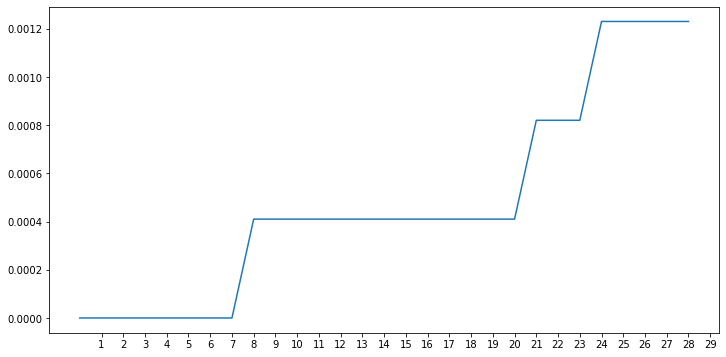

In [128]:
ShowBestKNN(S_X_train, y_train, S_X_test, y_test)

# Step8: Creating a Pipeline to find K value

In [35]:
scaler = StandardScaler()
knn = KNeighborsClassifier()
operatin = [('scaler', scaler), ('knn', knn)]

In [36]:
pipe = Pipeline(operatin)

In [37]:
K_Value = list(range(1,30))

p_grid = {'knn__n_neighbors': K_Value}

CV_grid = GridSearchCV(pipe, p_grid, cv = 7, scoring='accuracy')

CV_grid.fit(X,y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [38]:
CV_grid.get_params()

{'cv': 7,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier())],
 'estimator__verbose': False,
 'estimator__scaler': StandardScaler(),
 'estimator__knn': KNeighborsClassifier(),
 'estimator__scaler__copy': True,
 'estimator__scaler__with_mean': True,
 'estimator__scaler__with_std': True,
 'estimator__knn__algorithm': 'auto',
 'estimator__knn__leaf_size': 30,
 'estimator__knn__metric': 'minkowski',
 'estimator__knn__metric_params': None,
 'estimator__knn__n_jobs': None,
 'estimator__knn__n_neighbors': 5,
 'estimator__knn__p': 2,
 'estimator__knn__weights': 'uniform',
 'estimator': Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),
 'n_jobs': None,
 'param_grid': {'knn__n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29]},
 'p

# Challenge

### Step0: Import all Necessary Libraries

In [129]:
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
import pandas as pd

import statistics
import math

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

### Step1: Import the Dataset

In [130]:
cancer = load_breast_cancer()

data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)

### Step2: Data Overview


In [131]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Step3: X & y


In [133]:
df['target'] = df['target'].astype(int)

X = df.drop('target', axis=1)
y = df['target']

#X = cancer.data
#y = cancer.target
y = np.array(y)
X= np.array(X)


### Step4: Split the Data to Train & Test

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step5: Scaling the Features

In [135]:
s_X_train, s_X_test = ScaleData(X_train, X_test)

### Step8: Distance Function

In [136]:
A = s_X_test[1, :]
B = s_X_train[1, :]
A

array([ 1.36536344,  0.49866473,  1.30551088,  1.34147086, -0.40653902,
       -0.0137241 ,  0.24063659,  0.82144876, -0.83398079, -1.13121527,
        1.36745547, -0.74874907,  1.27009847,  1.18638199, -0.83350144,
       -0.49043919, -0.31559   ,  0.28726031, -0.82243534, -0.76235747,
        1.79461875,  0.17237239,  1.76366112,  1.7441412 , -0.53051417,
       -0.12362004, -0.02818105,  0.99177862, -0.561211  , -1.00838949])

In [137]:
B

array([ 1.97409619,  1.73302577,  2.09167167,  1.85197292,  1.319843  ,
        3.42627493,  2.01311199,  2.66503199,  2.1270036 ,  1.55839569,
        0.80531919, -0.81268678,  0.75195659,  0.87716951, -0.89605315,
        1.18122247,  0.18362761,  0.60059598, -0.31771686,  0.52963649,
        2.17331385,  1.3112795 ,  2.08161691,  2.1374055 ,  0.76192793,
        3.26560084,  1.92862053,  2.6989469 ,  1.89116053,  2.49783848])

In [138]:
def MinKowski(p1, p2, p):
    dis = math.pow(np.sum(np.abs(p1-p2)**p),1/p)
    return dis

In [139]:
def eucledian(p1, p2):
    dis = np.sqrt(np.sum((p1-p2)**2))
    return dis

In [140]:
MinK = MinKowski(A, B, 3)
MinK

6.09411052586609

In [141]:
euclidean = MinKowski(A, B, 2)
euclidean

9.262150397422202

In [142]:
eucledian(A, B)

9.262150397422202

In [143]:
CityBlock = MinKowski(A, B, 1)
CityBlock

39.902753742752445

In [144]:
Manhattan = MinKowski(A, B, 1)
Manhattan

39.902753742752445

In [145]:
def CityBlock(p1, p2):
    dis = np.sum(np.abs(p1-p2))
    return dis

In [146]:
CityBlock(A, B)

39.902753742752445

In [147]:
def Chebychev(p1, p2):
    dis = MinKowski(A, B, 200)    
    return dis

In [148]:
Chebychev(A, B)

3.506629873318485

In [149]:
def Cosine(p1, p2):
    e1 = np.dot(p1 , p2)
    
    e2 = np.dot(p1 , p1)    
    
    e3 = np.dot(p2 , p2)    
    
    Cosin = e1 / np.sqrt(e2 * e3)
    
    dis = 1 - Cosin 
    
    return dis 

In [150]:
Cosine(A, B)

0.6053897226403869

In [151]:
def corr(A, B):
    A = pd.Series(A)
    B= pd.Series(B)
    
    dis = 1- A.corr(B)
    return dis

In [152]:
def corr2(A, B):
    e1 = ((A-np.mean(A)).T/statistics.stdev(A))
    
    e2 = ((B-np.mean(B))/statistics.stdev(B))
    
    r = 1/(A.shape[0]-1) * np.sum(e1 *e2)
    
    dis = 1- r
    return dis

In [153]:
corr(A, B)

0.6720661506592798

In [154]:
corr2(A, B)

0.6720661506592797

In [69]:
def Distance_Complete(p1 , p2):
    
    while True:

        dis = 0 
        c = input('Which Criterion E(Euclidean)/M(Manhattan)/V(chebychev)/K(MinKowski)/C(Cosine)/R(Correlation)/Enter break):')

        if c == 'E' or c == 'Euclidean' or c == '2':
            dis = MinKowski(p1, p2, 2)
        elif c == 'M' or c == 'Manhattan' or c == '1':
            dis = MinKowski(p1, p2, 1)
        elif c == 'V' or c == 'chebychev' or c == '1':
            dis = MinKowski(p1, p2, 100)
        elif c == 'K' or c == 'MinKowski':
            dis = MinKowski(p1, p2, 4)
        elif c == 'C' or c == 'Cosine':
            dis = Cosine(p1, p2)
        elif c == 'R' or c == 'Correlation':
            dis = corr(p1, p2)
        elif c == 'break':
            break
        else:
            print('Error')
            continue

        print(dis) 
        
    return dis 

In [70]:

Distance_Complete(A, B)


Which Criterion E(Euclidean)/M(Manhattan)/V(chebychev)/K(MinKowski)/C(Cosine)/R(Correlation)/Enter break):E
9.262150397422202
Which Criterion E(Euclidean)/M(Manhattan)/V(chebychev)/K(MinKowski)/C(Cosine)/R(Correlation)/Enter break):2
9.262150397422202
Which Criterion E(Euclidean)/M(Manhattan)/V(chebychev)/K(MinKowski)/C(Cosine)/R(Correlation)/Enter break):break


0

In [155]:
def Distance_Compute(p1 , p2 , c):

    dis = 0 

    if c == 'E' or c == 'Euclidean' or c == '2':
        dis = MinKowski(p1, p2, 2)
    elif c == 'M' or c == 'Manhattan' or c == '1':
        dis = MinKowski(p1, p2, 1)
    elif c == 'V' or c == 'chebychev' or c == '50':
        dis = MinKowski(p1, p2, 50)
    elif c == 'K' or c == 'MinKowski' or c == '4':
        dis = MinKowski(p1, p2, 4)
    elif c == 'C' or c == 'Cosine':
        dis = Cosine(p1, p2)
    elif c == 'R' or c == 'Correlation':
        dis = corr(p1, p2)
    else:
        print('Error')
 
    return dis 

### Step6: KNN Scratch

In [156]:
def KNN_pred(x_train, y, x_test, k, p):
    pred_l = []
    for item in x_test:
      
        point_dis = []
        for j in range(len(x_train)):
            distance = Distance_Compute(np.array(x_train[j, :]), item, p)
            
            point_dis.append(distance)
        point_dis = np.array(point_dis)
        
        dist = np.argsort(point_dis)[:k]
        
        labeles = y[dist]
       
        vote = mode(labeles)
        
        vote = vote.mode[0]
        
        pred_l.append(vote)
    return pred_l

In [157]:
y_pred = KNN_pred(s_X_train, y_train, s_X_test, 7, '2')
accuracy_score(y_test, y_pred)

0.9473684210526315

In [158]:
y_pred = KNN_pred(X_train, y_train, X_test, 7, '2')
accuracy_score(y_test, y_pred)

0.956140350877193

### Step7: KNN Model Scikitlearn

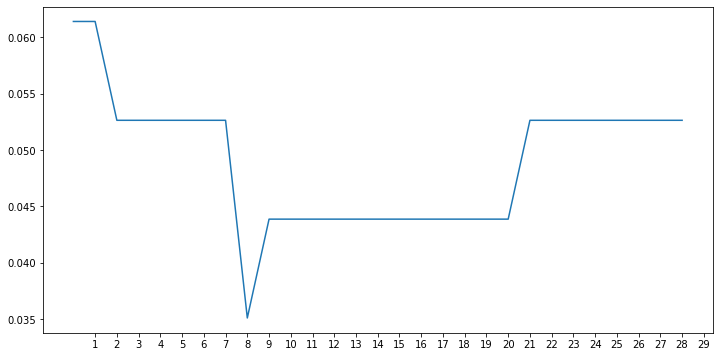

In [99]:
ShowBestKNN(s_X_train, y_train, s_X_test, y_test) 

In [100]:
KNN_model = KNeighborsClassifier(n_neighbors=5, weights='distance' , metric='minkowski', p=2)
KNN_model.fit(s_X_train, y_train)    
y_pred = KNN_model.predict(s_X_test)

accuracy_score(y_test, y_pred)


0.9473684210526315

In [101]:
KNN_model = KNeighborsClassifier(n_neighbors=5, weights='distance' , metric='minkowski', p=2)
KNN_model.fit(X_train, y_train)    
y_pred = KNN_model.predict(X_test)

accuracy_score(y_test, y_pred)


0.956140350877193

### Step9: Deifferent Criteria for KNN Scratch

#### 1. Eucledian

In [88]:
y_pred = KNN_pred(s_X_train, y_train, s_X_test, 7, '2')
accuracy_score_Euclidean_Scaled = accuracy_score(y_test, y_pred)

y_pred = KNN_pred(X_train, y_train, X_test, 7, '2')
accuracy_score_Euclidean_Main = accuracy_score(y_test, y_pred)

#### 2. Manhattan

In [89]:
y_pred = KNN_pred(s_X_train, y_train, s_X_test, 7, '1')
accuracy_score_Manhattan_Scaled = accuracy_score(y_test, y_pred)

y_pred = KNN_pred(X_train, y_train, X_test, 7, '1')
accuracy_score_Manhattan_Main = accuracy_score(y_test, y_pred)

#### 3. Chebychev

In [90]:
y_pred = KNN_pred(s_X_train, y_train, s_X_test, 7, 'V')
accuracy_score_Chebychev_Scaled = accuracy_score(y_test, y_pred)

y_pred = KNN_pred(X_train, y_train, X_test, 7, 'V')
accuracy_score_Chebychev_Main = accuracy_score(y_test, y_pred)

#### 4. MinKowski

In [91]:
y_pred = KNN_pred(s_X_train, y_train, s_X_test, 7, 'K')
accuracy_score_MinKowski_Scaled = accuracy_score(y_test, y_pred)

y_pred = KNN_pred(X_train, y_train, X_test, 7, 'K')
accuracy_score_MinKowski_Main = accuracy_score(y_test, y_pred)

#### 5. Cosine

In [92]:
y_pred = KNN_pred(s_X_train, y_train, s_X_test, 7, 'C')
accuracy_score_Cosine_Scaled = accuracy_score(y_test, y_pred)

y_pred = KNN_pred(X_train, y_train, X_test, 7, 'C')
accuracy_score_Cosine_Main = accuracy_score(y_test, y_pred)

#### 6. Correlation

In [93]:
y_pred = KNN_pred(s_X_train, y_train, s_X_test, 7, 'R')
accuracy_score_Correlation_Scaled = accuracy_score(y_test, y_pred)

y_pred = KNN_pred(X_train, y_train, X_test, 7, 'R')
accuracy_score_Correlation_Main = accuracy_score(y_test, y_pred)

In [102]:
metric = pd.DataFrame([accuracy_score_Euclidean_Scaled,  accuracy_score_Euclidean_Main, 
                       accuracy_score_Manhattan_Scaled, accuracy_score_Manhattan_Main,
                       accuracy_score_Chebychev_Scaled,  accuracy_score_Chebychev_Main,
                       accuracy_score_MinKowski_Scaled,  accuracy_score_MinKowski_Main,
                       accuracy_score_Cosine_Scaled,     accuracy_score_Cosine_Main,
                       accuracy_score_Correlation_Scaled,accuracy_score_Correlation_Main])
metric.set_axis(['accuracy_score_Euclidean_Scaled',  'accuracy_score_Euclidean_Main', 
                 'accuracy_score_Manhattan_Scaled',  'accuracy_score_Manhattan_Main',
                 'accuracy_score_Chebychev_Scaled',  'accuracy_score_Chebychev_Main',
                 'accuracy_score_MinKowski_Scaled',  'accuracy_score_MinKowski_Main',
                 'accuracy_score_Cosine_Scaled',     'accuracy_score_Cosine_Main',
                 'accuracy_score_Correlation_Scaled','accuracy_score_Correlation_Main'], inplace=True)
metric.set_axis(['Metrics'], axis=1, inplace=True) 
metric


,Metrics
accuracy_score_Euclidean_Scaled,0.947368
accuracy_score_Euclidean_Main,0.956140
accuracy_score_Manhattan_Scaled,0.964912
accuracy_score_Manhattan_Main,0.938596
accuracy_score_Chebychev_Scaled,0.929825
accuracy_score_Chebychev_Main,0.956140
accuracy_score_MinKowski_Scaled,0.947368
accuracy_score_MinKowski_Main,0.956140
accuracy_score_Cosine_Scaled,0.964912
accuracy_score_Cosine_Main,0.938596


In [103]:
metric.sort_values(by='Metrics' )

,Metrics
accuracy_score_Correlation_Scaled,0.824561
accuracy_score_Chebychev_Scaled,0.929825
accuracy_score_Manhattan_Main,0.938596
accuracy_score_Cosine_Main,0.938596
accuracy_score_Correlation_Main,0.938596
accuracy_score_Euclidean_Scaled,0.947368
accuracy_score_MinKowski_Scaled,0.947368
accuracy_score_Euclidean_Main,0.956140
accuracy_score_Chebychev_Main,0.956140
accuracy_score_MinKowski_Main,0.956140


## Manhattan and Cosine  are  the best 

<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Well done!</h1>
  <p>Best Wishes!, Filoger</p>
</div>